sklearn 

<p>Training Mean Squared Error: 0.0489824898604543 </p>
Testing Mean Squared Error: 0.06042090845329379
Weights:
 0.8309391439774136x0 + 0.7762599505228542x1 + 1.446567770909641x2 + 0.15214710306383847x3 + 0.029196437561490172x4 + 0.853794165135476x5 + 0.06090738160517823x6 + 0.24466438867040316x7 + 0.14996882452883592x8 + 0.1036268013598201x9 + -0.47334459888308034x10 + -0.7921349860631708x11 + -0.08419129936507729x12 + 0.18442592117084272x13 + -0.007669261517557514x14 + -0.013097464046530059x15 + -1.1605904849308204x16 + -0.28399830888370875x17 + -0.8018903365141713x18 + -3.7166802649951567x19 + 0.4013747959260722x20 + -0.09043015581536554x21 + -1.2738217035514714x22 + 3.5737599582760873x23 + 1.4130431130022314x24 + -0.6376749488741691x25 + -2.6168324014359485x26 + -0.912867907694149x27 + 2.5412223620577525x28 + -8.056600336321853x29 + 7.328543224256008x30 + 2.874686521539504x31 + -0.7927940765796742x32 




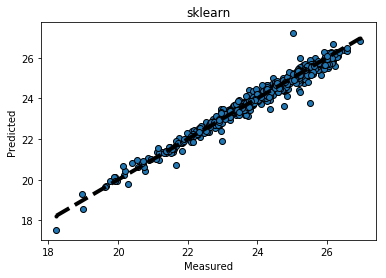

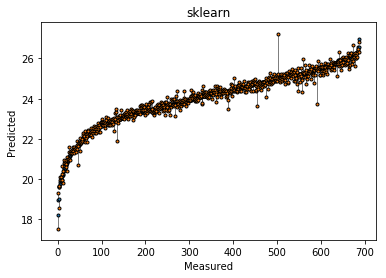

In [4]:
%matplotlib inline

# import numpy for use of matrix multiplication
import numpy as np
# import scipy for use in linear regression base testing
from scipy import linalg
# allows data input processing
import pandas as pd
# allows a deep copy
from copy import deepcopy

# import sklearn modules for use in lin regression
# import function to split data
from sklearn.model_selection import train_test_split
# import function to generate mean squared error
from sklearn.metrics import mean_squared_error
# import dataset for use in boston dataset
from sklearn import linear_model
# import matplotlib to allow visualization of data
import matplotlib.pyplot as plt
# import LineCollection to draw lines
from matplotlib.collections import LineCollection


def read_table(path):
    ''' input the file as a pandas table '''
    return pd.read_csv(path,header=0)
    

def remove_columns(table):
    ''' process the data table by removing unwanted columns '''
    # find all columns that are errors
    drop_col = [x for x in table.columns if x.startswith('e')]
    # add the id to columns to remove
    drop_col.append('Nr')
    # drop preselected columns and remove rows with NaN
    proc = table.drop(drop_col,axis=1).dropna()
    # return processed data
    return proc


def process_data(data):
    ''' modify data such that it represents the 80% training, 20% testin '''
    # select the index for the training data
    ntrain = round(data.shape[0]*0.2)
    # split training data and target by 80% and 20%
    data_train,target_train = data[ntrain:,1:],data[ntrain:,:1]
    # split testing data and target by 80% and 20%
    data_test,target_test = data[:ntrain,1:],data[:ntrain,:1]
    # return training data and target, and testing data and target
    return data_train,target_train,data_test,target_test


def parse(path='data/COMBO17.csv'):
    ''' get training and testing data and target from data file '''
    # input pandas table from filepath
    init_table = read_table(path)
    # remove the columns and rows that are unusable
    table = remove_columns(init_table)
    # convert pandas table to numpy array
    data = np.array(table)
    # return the training and testing data and target
    return process_data(data)


def plot_lines(title,ax,target,predict):
    ''' plot a single subplot based on targets and predictions '''
    # create single scatterplot
    ax.scatter(target,predict,edgecolors=(0,0,0))
    # get minimum and maximum from target data
    data_min,data_max = np.amin(target),np.amax(target)
    # set regression line
    ax.plot([data_min,data_max],[data_min,data_max],'k.--',lw=4)
    # set the title for the subplot
    ax.set_title(title)
    # label the x axis
    ax.set_xlabel('Measured')
    # label the y axis
    ax.set_ylabel('Predicted')


def plot_dots(title,ax,target,predict):
    ''' plot a single subplot based on targets and predictions '''
    # get number of data points
    N = len(predict)
    # create range of values based on number data points
    x = np.arange(N)
    # get array of indeces from sorted target data
    inds = np.argsort(target.T[0])
    # sort target data
    targ_s = target.T[0][inds]
    # sort prediction data
    pred_s = predict.T[0][inds]    
    # get coordinates of lines connecting target and prediction
    points = np.array([[[i, targ_s[i]], [i, pred_s[i]]] for i in range(N)])
    # create line object based on coordinates
    lines = LineCollection(points,linewidths=1,colors='black',zorder=0)
    # halve the width of the lines
    lines.set_linewidths(0.5*np.ones(N))
    # set the target points on subplot
    ax.scatter(x,targ_s,s=9,edgecolors=(0,0,0))
    # set the prediction points on the subplot
    ax.scatter(x,pred_s,s=9,edgecolors=(0,0,0))
    # add lines between target and prediction
    ax.add_collection(lines)
    # set title of subplot
    ax.set_title(title)
    # set title of x axis
    ax.set_xlabel('Measured')
    # set title of y axis
    ax.set_ylabel('Predicted')


def print_one(title,weight,mse_test,mse_train):
    ''' prints the mean squared errors per each type of analysis '''
    # print type of analysis
    print(title,'\n')
    # print training mean squared error
    print('Training Mean Squared Error:',mse_train)
    # print testing mean squared error
    print('Testing Mean Squared Error:',mse_test)
    # create equation with coefficients and variables
    weight_str = [str(w)+'x'+str(i) for i,w in enumerate(weight[0])]
    # print the weight equation
    print('Weights:\n',' + '.join(weight_str),'\n\n')


def output_one(title,target,weight,prediction,mse_test,mse_train):
    ''' output a single entry and graph '''
    # create single subplot
    fig1, ax1 = plt.subplots(1,sharex=True)
    # create single subplot
    fig2, ax2 = plt.subplots(1,sharex=True)
    # print type of analysis, weight, mean squared errors
    print_one(title,weight,mse_test,mse_train)
    # plot the linear regression line
    plot_lines(title,ax1,target,prediction)
    # plot the offset between target and prediction
    plot_dots(title,ax2,target,prediction)
    # show the graphs
    plt.show()

    

def linear_regression(data_train,target_train,data_test,target_test):
    ''' linear regression function from training and testing data and target '''
    # initialize linear regression object
    regr = linear_model.LinearRegression()
    # train the regression model with the training data and target
    regr.fit(data_train,target_train)
    # calculate the mean squared error for the training data
    mse_train = mean_squared_error(target_train,regr.predict(data_train))
    # calculate the predicted target from the testing data with the coefficients
    predict = regr.predict(data_test)
    # calculate the mean squared error for the testing data
    mse_test = mean_squared_error(target_test,predict)
    # return the weights, predicted target, and mean squared errors for training 
    return regr.coef_,predict,mse_test,mse_train


def driver():
    ''' intiialize and run testing on data '''
    # return training and testing data and target
    data_train,target_train,data_test,target_test = parse()
    # git weights, predicted target, mse testing and training from linear regression model
    weights,prediction,mse_test,mse_train = linear_regression(data_train,target_train,data_test,target_test)
    # output print and graphs from processed data
    output_one('sklearn',target_test,weights,prediction,mse_test,mse_train)

    
if __name__ == '__main__':
    ''' entry point of program '''
    driver()
